In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Importing the dataset


dataset = pd.read_csv('Mall_Customers.csv')       #dataset is of type DataFrame

X = dataset.iloc[:,[3,4]].values

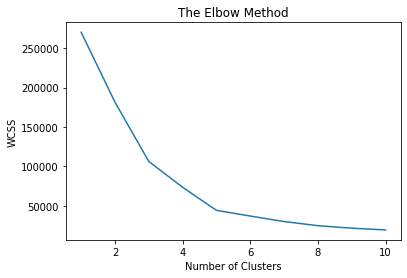

In [6]:
#Using Elbow Method to find optimal value of clusters
from sklearn.cluster import KMeans

wcss=[]                                                          #This will be the sum of distances of all data points from their cluster centroid

for i in range (10):                                             #The dataset hat 10 Data points
  kmeans = KMeans( n_clusters = i+1 , init = 'k-means++' , max_iter = 300 ,n_init = 10 , random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11) ,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

So,The optimum number of cluster is 5.

In [19]:
#Applying k-means to the mall dataset
kmeans = KMeans( n_clusters = 5 , init = 'k-means++' , max_iter = 300 ,n_init = 10 , random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


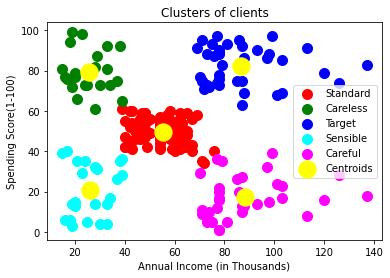

In [22]:
#Visualizing The Clusters
plt.scatter(X[y_kmeans == 0 ,0], X[y_kmeans == 0 ,1], s = 100 , c = 'red' , label = 'Standard')
plt.scatter(X[y_kmeans == 1 ,0], X[y_kmeans == 1 ,1], s = 100 , c = 'green' , label = 'Careless')
plt.scatter(X[y_kmeans == 2 ,0], X[y_kmeans == 2 ,1], s = 100 , c = 'blue' , label = 'Target')
plt.scatter(X[y_kmeans == 3 ,0], X[y_kmeans == 3 ,1], s = 100 , c = 'cyan' , label = 'Sensible')
plt.scatter(X[y_kmeans == 4 ,0], X[y_kmeans == 4 ,1], s = 100 , c = 'magenta' , label = 'Careful')

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], s = 300 , c='yellow' , label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (in Thousands)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()